In [48]:
import pandas as pd
import numpy as np
import math
from scipy.stats import pearsonr
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [49]:
dataframe = pd.read_csv("QSAR_fish_BCF/QSAR_BCF_Kow.csv")

In [50]:
data=dataframe.iloc[:,[0,3,5]].to_numpy()

In [51]:
for i in range(data.shape[0]):
    if data[i,0][:8]=="V-Mey_NA":
        data[i,1]=float("Nan")

In [52]:
sum1=0.0
sum2=0.0
n1=0
n2=0
for i in range(data.shape[0]):
    if not math.isnan(data[i,1]):
        sum1+=data[i,1]
        n1+=1
    if not math.isnan(data[i,2]):
        sum2+=data[i,2]
        n2+=1
for i in range(data.shape[0]):
    if math.isnan(data[i,1]):
        data[i,1]=sum1/n1
    if math.isnan(data[i,2]):
        data[i,2]=sum2/n2

In [53]:
data=data[:,1:]

In [54]:
corrcoef,_=pearsonr(data[:,0],data[:,1])
print("Correlation Coefficient = %.3f"%corrcoef)

Correlation Coefficient = 0.664


In [55]:
sc=MinMaxScaler()
data=sc.fit_transform(data)

In [56]:
lr=LinearRegression()
lr.fit(data[:,0].reshape(-1,1),data[:,1])
print("m = %f, c = %f"%(lr.coef_[0],lr.intercept_))

m = 1.161909, c = 0.073834


In [57]:
ypred=lr.predict(data[:,0].reshape(-1,1))
mse=mean_squared_error(data[:,1], ypred)
mae=mean_absolute_error(data[:,1],ypred)
r2=r2_score(data[:,1],ypred)
print("Mean Squared Error : %f\nMean Absolute Error : %f\nr2 : %f"%(mse, mae, r2))

Mean Squared Error : 0.017014
Mean Absolute Error : 0.097641
r2 : 0.441500


In [58]:
x_train, x_test, y_train, y_test =  train_test_split(data[:, 0], data[:, 1], test_size = 308/(308+750), random_state= 0)

y_pred = lr.coef_[0]*x_test + lr.intercept_
print(y_test)

[0.23840206 0.36984536 0.5257732  0.39690722 0.66108247 0.35309278
 0.57216495 0.58891753 0.2564433  0.41365979 0.37371134 0.22164948
 0.57087629 0.56829897 0.48324742 0.57731959 0.52963918 0.68556701
 0.56314433 0.23324742 0.39690722 0.29639175 0.46907216 0.75515464
 0.82216495 0.47551546 0.32989691 0.6185567  0.24226804 0.40721649
 0.78350515 0.58891753 0.70231959 0.31572165 0.47036082 0.35180412
 0.65721649 0.5193299  0.32989691 0.61469072 0.72938144 0.96778351
 0.36082474 0.5064433  0.52835052 0.43041237 0.76546392 0.33891753
 0.39690722 0.56701031 0.64948454 0.72809278 0.45360825 0.64690722
 0.45876289 0.65335052 0.70747423 0.22551546 0.32474227 0.37886598
 0.68041237 0.34149485 0.41881443 0.67139175 0.43556701 0.63015464
 0.16881443 0.28865979 0.39561856 0.21134021 0.40721649 0.54381443
 0.61082474 0.38659794 0.44974227 0.56443299 0.29896907 0.76030928
 0.69458763 0.39304124 0.28865979 0.69974227 0.59793814 0.58634021
 0.41881443 0.45618557 0.55412371 0.47293814 0.56829897 0.1572

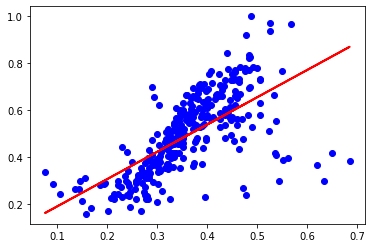

In [60]:
plt.scatter(x_test, y_test,  color='blue')
plt.plot(x_test, y_pred, color='red', linewidth=2)
plt.show()

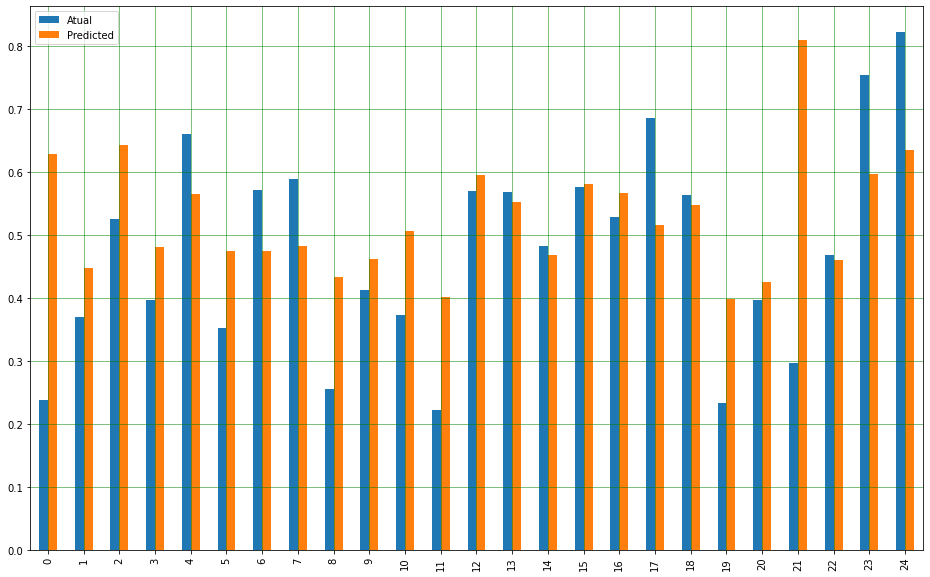

In [59]:

df = pd.DataFrame({'Atual' : y_test, 'Predicted': y_pred})
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()